<a href="https://colab.research.google.com/github/Alan-Hans/Challenge-Data-Scientist/blob/developement/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This challenge requires to predict the probability of delay of flights at Santiago de Chile Airport (SCL) using a provided dataset. This work was developed by Alan Hans Bitterlich Koning, email: Alan.bitterlich.k@gmail.com. The index of this notebook is the following: 
```
1.- Import data 
2.- EDA
3.- Models
4.- Results
5.- Comments


#1.- Import data

In [1454]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Alan-Hans/Challenge-Data-Scientist/main/dataset_SCL.csv'

df = pd.read_csv(url)

URLError: ignored

In [1455]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,high_season,Date-O,min_diff,period_day,delay_15,DIANOM_int,period_day_int,OPERA_int,SIGLAORI_int,SIGLADES_int
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,0,2017-01-01 23:33:00,3.0,night,0,6,2,0,0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,0,2017-01-02 23:39:00,9.0,night,0,0,2,0,0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,0,2017-01-03 23:39:00,9.0,night,0,1,2,0,0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,0,2017-01-04 23:33:00,3.0,night,0,2,2,0,0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,0,2017-01-05 23:28:00,-2.0,night,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66573,2017-12-25 20:11:00,305,SCEL,SCCI,JAT,2017-12-25 20:13:00,305.0,SCEL,SCCI,JAT,...,1,2017-12-25 20:13:00,2.0,night,0,0,2,20,0,21
66574,2017-12-30 04:05:00,305,SCEL,SCCI,JAT,2017-12-30 04:00:00,305.0,SCEL,SCCI,JAT,...,1,2017-12-30 04:00:00,-5.0,night,0,5,2,20,0,21
66575,2017-12-29 18:30:00,307,SCEL,SCCI,JAT,2017-12-29 18:31:00,307.0,SCEL,SCCI,JAT,...,1,2017-12-29 18:31:00,1.0,afternoon,0,4,1,20,0,21
66576,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,1,2017-12-29 15:08:00,13.0,afternoon,0,4,1,20,0,15


Description of every column
```
Fecha-I: Scheduled date and time of departure (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-I: Scheduled flight number (text)
Ori-I: Origin city code (text)
Des-I: destination city code. (text)
Emp-I: Scheduled airline code (text)
Fecha-O: Date and time of arrival (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-O: Flight operation number of the flight (text)
Ori-O: Operation origin city code (text)
Des-O: Operation destination city code (text)
Emp-O: Airline code of the operated flight (text)
DIA: Day of the month (numeric)
MES: Month of the year (numeric)
AÑO: Year (numeric)
DIANOM: Day of the week (text)
TIPOVUELO: Type of flight, I =International, N =National (text)
OPERA: Operating airline company (text)
SIGLAORI: Name city of origin (text)
SIGLADES: Destination city name (text)'



#2.- EDA

 
#Some interesting insights from this analysis: 

*   It shows that the largest number of flights in this data correspond to Grupo LATAM airlines with about 58%.
*   The Top 5 destinations are: Buenos Aires,     Antofagasta,   Lima,             
Calama and           Puerto Montt.
*   Most flights are made during the month of December and on Fridays.


 


In [1456]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the first few rows of the dataset to get a sense of its structure
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# List of columns
print(df.info())

               Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  ...  high_season              Date-O  min_diff  \
0  SCEL  KMIA   AAL  ...            0 2017-01-01 23:33:00       3.0   
1  SCEL  KMIA   AAL  ...            0 2017-01-02 23:39:00       9.0   
2  SCEL  KMIA   AAL  ...            0 2017-01-03 23:39:00       9.0   
3  SCEL  KMIA   AAL  ...            0 2017-01-04 23:33:00       3.0   
4  SCEL  KMIA   AAL  ...            0 2017-01-05 23:28:00      -2.0   

  period_day delay_15 DIANOM_int period_day_int OPERA_int  SIGLAORI_int  \
0      night        0          6   

In [1457]:
## For the purpose of this analysis, null results will be filtered out, which apparently corresponds to only 1, so it will not have a great impact and drop duplicate if there are.
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66578 entries, 0 to 66577
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         66578 non-null  object        
 1   Vlo-I           66578 non-null  object        
 2   Ori-I           66578 non-null  object        
 3   Des-I           66578 non-null  object        
 4   Emp-I           66578 non-null  object        
 5   Fecha-O         66578 non-null  object        
 6   Vlo-O           66578 non-null  object        
 7   Ori-O           66578 non-null  object        
 8   Des-O           66578 non-null  object        
 9   Emp-O           66578 non-null  object        
 10  DIA             66578 non-null  int64         
 11  MES             66578 non-null  int64         
 12  AÑO             66578 non-null  int64         
 13  DIANOM          66578 non-null  object        
 14  TIPOVUELO       66578 non-null  object        
 15  OP

In [1458]:
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

Fecha-I
Unique Values: 52210
2017-03-26 18:00:00    6
2017-03-19 18:00:00    6
2017-02-06 21:50:00    5
2017-11-14 09:30:00    5
2017-08-24 13:00:00    5
                      ..
2017-05-19 02:45:00    1
2017-05-21 14:00:00    1
2017-05-22 02:45:00    1
2017-05-28 14:00:00    1
2017-12-31 14:55:00    1
Name: Fecha-I, Length: 52210, dtype: int64
Vlo-I
Unique Values: 740
174     676
11      642
150     552
162     552
164     548
       ... 
60        1
1234      1
1034      1
1043      1
1134      1
Name: Vlo-I, Length: 740, dtype: int64
Ori-I
Unique Values: 1
SCEL    66578
Name: Ori-I, dtype: int64
Des-I
Unique Values: 64
SCFA    5717
SPJC    5157
SCCF    5090
SCTE    4303
SCIE    3938
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64
Emp-I
Unique Values: 30
LAN    37238
SKU    14128
TAM     2992
CMP     1809
ARG     1729
LAW     1490
AVA     1015
JAT      988
AAL      730
GLO      686
ACA      425
AMX      349
DAL      

In [1459]:
# Create a new categorical column based on Column1
df['TIPOVUELO_int'] = df['TIPOVUELO'].apply(lambda x: 1 if x == 'I' else 0)

# Print the updated dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66578 entries, 0 to 66577
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         66578 non-null  object        
 1   Vlo-I           66578 non-null  object        
 2   Ori-I           66578 non-null  object        
 3   Des-I           66578 non-null  object        
 4   Emp-I           66578 non-null  object        
 5   Fecha-O         66578 non-null  object        
 6   Vlo-O           66578 non-null  object        
 7   Ori-O           66578 non-null  object        
 8   Des-O           66578 non-null  object        
 9   Emp-O           66578 non-null  object        
 10  DIA             66578 non-null  int64         
 11  MES             66578 non-null  int64         
 12  AÑO             66578 non-null  int64         
 13  DIANOM          66578 non-null  object        
 14  TIPOVUELO       66578 non-null  object        
 15  OP

#Creation of feature variables

In [1460]:
import pandas as pd

# Assuming your date column is called "Date-I"
# Create a datetime object from the "Date-I" column
df['Date-I'] = pd.to_datetime(df['Fecha-I'], format="%Y-%m-%d %H:%M:%S")

# Define the high season periods
high_season_periods = [
    (pd.to_datetime('12-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('03-03-2018', format="%m-%d-%Y").date()),
    (pd.to_datetime('07-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('07-31-2017', format="%m-%d-%Y").date()),
    (pd.to_datetime('09-11-2017', format="%m-%d-%Y").date(), pd.to_datetime('09-30-2017', format="%m-%d-%Y").date())
]

# Define a function to check if a date is in a high season period
def is_in_high_season(date):
    for period in high_season_periods:
        if period[0] <= date.date() <= period[1]:
            return 1
    return 0

# Apply the function to create the "high_season" column
df['high_season'] = df['Date-I'].apply(is_in_high_season)

According to general instructions, it should be considered landing and takeoff of aircraft but it is not clear according to times if it is landing or taking off, variables are reviewed and it is not possible to conclude if it is landing or taking off without an extra variable. Therefore we proceed to create the function taking into consideration that only time will be subtracted and in case the result is negative it will be consider as negative in order to enter to the predicction.

In [1461]:
import pandas as pd

# Convert date columns to datetime format
df['Date-I'] = pd.to_datetime(df['Fecha-I'])
df['Date-O'] = pd.to_datetime(df['Fecha-O'])

# Handle negative values in min_diff column
# Calculate the time difference between two columns
df['min_diff'] = df.apply(lambda row: (row['Date-O'] - row['Date-I']).total_seconds() / 60 if row['Date-O'] > row['Date-I'] else (row['Date-I'] - row['Date-O']).total_seconds() / -60, axis=1)




# Add period_day column based on Date-I
df['period_day'] = df['Date-I'].apply(lambda x: 'morning' if 5 <= x.hour < 12 else ('afternoon' if 12 <= x.hour < 19 else 'night'))

# Create a function to set delay_15 column based on min_diff
def set_delay_15(x):
    if x > 15:
        return 1
    else:
        return 0

# Apply the set_delay_15 function to create delay_15 column
df['delay_15'] = df['min_diff'].apply(set_delay_15)

# Print the updated dataframe
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,high_season,Date-O,min_diff,period_day,delay_15,DIANOM_int,period_day_int,OPERA_int,SIGLAORI_int,SIGLADES_int
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,0,2017-01-01 23:33:00,3.0,night,0,6,2,0,0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,0,2017-01-02 23:39:00,9.0,night,0,0,2,0,0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,0,2017-01-03 23:39:00,9.0,night,0,1,2,0,0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,0,2017-01-04 23:33:00,3.0,night,0,2,2,0,0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,0,2017-01-05 23:28:00,-2.0,night,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66573,2017-12-25 20:11:00,305,SCEL,SCCI,JAT,2017-12-25 20:13:00,305.0,SCEL,SCCI,JAT,...,1,2017-12-25 20:13:00,2.0,night,0,0,2,20,0,21
66574,2017-12-30 04:05:00,305,SCEL,SCCI,JAT,2017-12-30 04:00:00,305.0,SCEL,SCCI,JAT,...,1,2017-12-30 04:00:00,-5.0,night,0,5,2,20,0,21
66575,2017-12-29 18:30:00,307,SCEL,SCCI,JAT,2017-12-29 18:31:00,307.0,SCEL,SCCI,JAT,...,1,2017-12-29 18:31:00,1.0,afternoon,0,4,1,20,0,21
66576,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,1,2017-12-29 15:08:00,13.0,afternoon,0,4,1,20,0,15


In [1462]:
# create dictionary to map string values to integers
mapping_dict = {
    'Lunes': 0,
    'Martes': 1,
    'Miercoles': 2,
    'Jueves': 3,
    'Viernes': 4,
    'Sabado': 5,
    'Domingo': 6
}

# create new column using map method with dictionary
df['DIANOM_int'] = df['DIANOM'].map(mapping_dict)

# add 7 as a possible value (since there are 7 string values)
df['DIANOM_int'] = df['DIANOM_int'].fillna(7).astype(int)

In [1463]:
# create dictionary to map string values to integers
mapping_dict = {
    'morning': 0,
    'afternoon': 1,
    'night': 2,
}

# create new column using map method with dictionary
df['period_day_int'] = df['period_day'].map(mapping_dict)

# add 7 as a possible value (since there are 7 string values)
df['period_day_int'] = df['period_day_int'].fillna(7).astype(int)

In [1464]:
cat_var = ['OPERA','SIGLAORI',"SIGLADES"]
for i in cat_var:
   name = i + '_int'
   df[name] = pd.factorize(df[i])[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66578 entries, 0 to 66577
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         66578 non-null  object        
 1   Vlo-I           66578 non-null  object        
 2   Ori-I           66578 non-null  object        
 3   Des-I           66578 non-null  object        
 4   Emp-I           66578 non-null  object        
 5   Fecha-O         66578 non-null  object        
 6   Vlo-O           66578 non-null  object        
 7   Ori-O           66578 non-null  object        
 8   Des-O           66578 non-null  object        
 9   Emp-O           66578 non-null  object        
 10  DIA             66578 non-null  int64         
 11  MES             66578 non-null  int64         
 12  AÑO             66578 non-null  int64         
 13  DIANOM          66578 non-null  object        
 14  TIPOVUELO       66578 non-null  object        
 15  OP

#Outliers treatment

In [1465]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 2
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [1466]:
>>> from collections import Counter

df.loc[detect_outliers(df,['DIA',
 'MES',
 'AÑO',
 'TIPOVUELO_int',
 'TIPOVUELO_int',
 'Date-I',
 'high_season',
 'Date-O',
 'min_diff',
 'delay_15',
 'DIANOM_int',
 'period_day_int',
 'OPERA_int',
 'SIGLAORI_int',
 'SIGLADES_int'])]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,high_season,Date-O,min_diff,period_day,delay_15,DIANOM_int,period_day_int,OPERA_int,SIGLAORI_int,SIGLADES_int
33046,2017-07-26 08:25:00,8073,SCEL,SBGR,TAM,2017-07-26 09:01:00,8073,SCEL,SBGR,TAM,...,1,2017-07-26 09:01:00,36.0,morning,1,2,0,16,0,11
33097,2017-07-21 08:35:00,8125,SCEL,SBGL,TAM,2017-07-21 09:11:00,8125,SCEL,SBGL,TAM,...,1,2017-07-21 09:11:00,36.0,morning,1,4,0,16,0,12
33766,2017-07-31 11:15:00,126,SCEL,SCCF,SKU,2017-07-31 11:52:00,126,SCEL,SCCF,SKU,...,1,2017-07-31 11:52:00,37.0,morning,1,0,0,17,0,29
34302,2017-07-18 07:30:00,551,SCEL,SUMU,SKU,2017-07-18 08:06:00,551,SCEL,SUMU,SKU,...,1,2017-07-18 08:06:00,36.0,morning,1,1,0,17,0,35
34315,2017-07-21 20:10:00,553,SCEL,SUMU,SKU,2017-07-21 20:46:00,553,SCEL,SUMU,SKU,...,1,2017-07-21 20:46:00,36.0,night,1,4,2,17,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54986,2017-11-29 16:16:00,116,SCEL,SKBO,AVA,2017-11-29 16:53:00,116,SCEL,SKBO,AVA,...,0,2017-11-29 16:53:00,37.0,afternoon,1,2,1,6,0,6
60565,2017-11-17 17:42:00,201,SCEL,SCIE,JAT,2017-11-17 18:20:00,201,SCEL,SCIE,JAT,...,0,2017-11-17 18:20:00,38.0,afternoon,1,4,1,20,0,26
60717,2017-12-06 21:10:00,93,SCEL,CYYZ,ACA,2017-12-06 21:48:00,93,SCEL,CYYZ,ACA,...,0,2017-12-06 21:48:00,38.0,night,1,2,2,1,0,3
60845,2017-12-10 19:25:00,1287,SCEL,SAEZ,ARG,2017-12-10 20:01:00,1287,SCEL,SAEZ,ARG,...,0,2017-12-10 20:01:00,36.0,night,1,6,2,4,0,2


In [1467]:
df = df.drop(detect_outliers(df,['DIA',
 'MES',
 'AÑO',
 'TIPOVUELO_int',
 'TIPOVUELO_int',
 'Date-I',
 'high_season',
 'Date-O',
 'min_diff',
 'delay_15',
 'DIANOM_int',
 'period_day_int',
 'OPERA_int',
 'SIGLAORI_int',
 'SIGLADES_int']),axis = 0).reset_index(drop = True)

#Graph analisis and ratios

In [1468]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['high_season'] == 1)].shape[0]
count_2 = df[(df['high_season'] == 1)].shape[0]
ratio = count / count_2
count_3 = df[(df['delay_15'] == 1) & (df['high_season'] == 0)].shape[0]
count_4 = df[(df['high_season'] == 0)].shape[0]
ratio_2 = count_3 / count_4

print ('Ratio referring to high season and delay:' )
print (ratio)

print ('Ratio referring to low season and delay:' )
print (ratio_2)



Ratio referring to high season and delay:
0.14584899581140587
Ratio referring to low season and delay:
0.16586997250967414


In [1469]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['period_day'] == 'night')].shape[0]
count_2 = df[(df['period_day'] == 'night')].shape[0]
ratio = count / count_2

count_3 = df[(df['delay_15'] == 1) & (df['period_day'] == 'afternoon')].shape[0]
count_4 = df[(df['period_day'] == 'afternoon')].shape[0]
ratio_2 = count_3 / count_4

count_5 = df[(df['delay_15'] == 1) & (df['period_day'] == 'morning')].shape[0]
count_6 = df[(df['period_day'] == 'morning')].shape[0]
ratio_3 = count_5 / count_6

print ('Ratio referring to period day night delay:' )
print (ratio)

print ('Ratio referring to period day afternoon delay:' )
print (ratio_2)

print ('Ratio referring to period day morning delay:' )
print (ratio_3)

Ratio referring to period day night delay:
0.17735625370480143
Ratio referring to period day afternoon delay:
0.1734466707144303
Ratio referring to period day morning delay:
0.14303537650420575


In [1470]:
period_day = df.groupby('delay_15')['period_day'].value_counts()
TIPOVUELO = df.groupby('delay_15')['TIPOVUELO'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
OPERA =  df.groupby('delay_15')['OPERA'].value_counts()
high_season =  df.groupby('delay_15')['high_season'].value_counts()
MES = df.groupby('delay_15')['MES'].value_counts()
DIA = df.groupby('delay_15')['DIA'].value_counts()
AÑO = df.groupby('delay_15')['AÑO'].value_counts()
DIANOM = df.groupby('delay_15')['DIANOM'].value_counts()

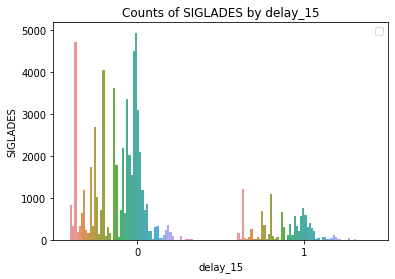

In [1471]:
sns.countplot(x='delay_15', hue='SIGLADES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('SIGLADES')
plt.title('Counts of SIGLADES by delay_15')
plt.legend(labels=[])
plt.show()

There are specific cities that have an influence on the delay.

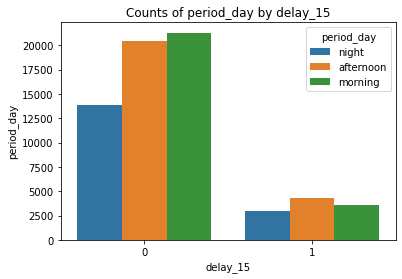

In [1472]:
sns.countplot(x='delay_15', hue='period_day', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('period_day')
plt.title('Counts of period_day by delay_15')
plt.show()

Delays usually occur in the afternoon or nights with the follow ratio Ratio Referring to period day night delay:
0.20002305741295826
Ratio referring to period day afternoon delay:
0.19940406178938289
Ratio referring to period day morning delay:
0.16007258096327562

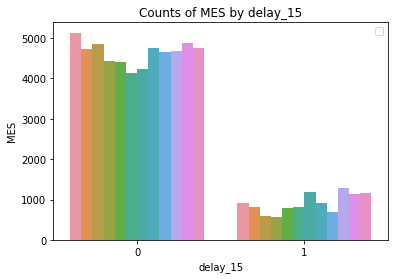

In [1473]:
sns.countplot(x='delay_15', hue='MES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('MES')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the month, it does provide information regarding the delay and it can be assimilated as that in holidays dates (December or July) there are considerable delays.

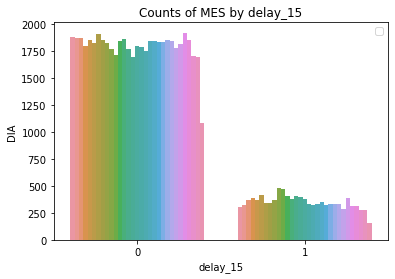

In [1474]:
sns.countplot(x='delay_15', hue='DIA', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIA')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the day, it does not provide much information and there is an uniform distribution.

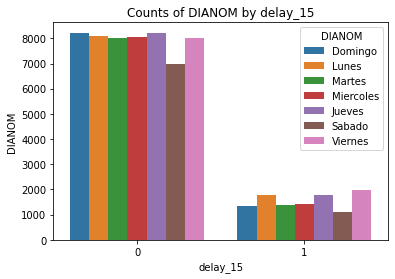

In [1475]:
sns.countplot(x='delay_15', hue='DIANOM', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIANOM')
plt.title('Counts of DIANOM by delay_15')
plt.show()

It is interesting the afluent on saturday is lower than the rest of the days and in sunday looks like there is better chances to have a delay.

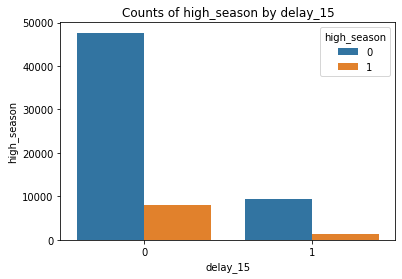

In [1476]:
sns.countplot(x='delay_15', hue='high_season', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('high_season')
plt.title('Counts of high_season by delay_15')
plt.show()

Ratio referring to high season (1) and delay:
0.24372384937238495
Ratio referring to low season (0) and delay:
0.17422732236648233

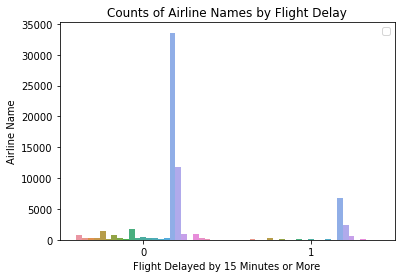

In [1477]:
sns.countplot(x='delay_15', hue='OPERA', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('Airline Name')
plt.title('Counts of Airline Names by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())
plt.legend(labels=[])


plt.show() 

Not much information on other flights mostly representing latam and sky airline.

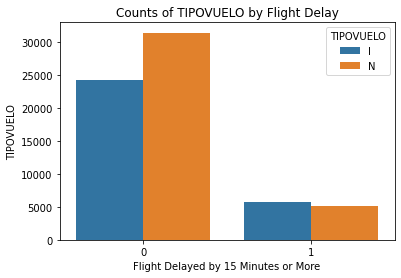

In [1478]:
sns.countplot(x='delay_15', hue='TIPOVUELO', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('TIPOVUELO')
plt.title('Counts of TIPOVUELO by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())



plt.show() 

International flights are more prone to delays. But nothing conclusive.

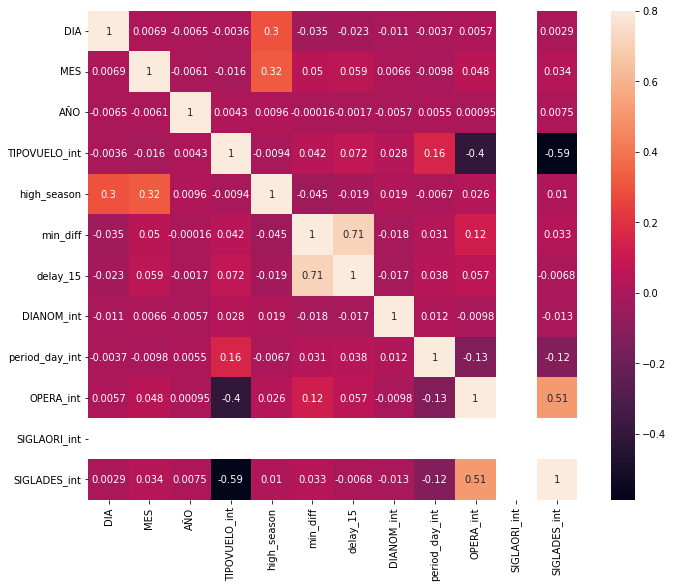

In [1479]:
import plotly.graph_objs as go
import plotly.offline as pyoff
import seaborn as sns

corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [1480]:
df['SIGLAORI_int']

0        0
1        0
2        0
3        0
4        0
        ..
66417    0
66418    0
66419    0
66420    0
66421    0
Name: SIGLAORI_int, Length: 66422, dtype: int64

#3.- Predictive model

# Prepare the data

In [1481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66422 entries, 0 to 66421
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         66422 non-null  object        
 1   Vlo-I           66422 non-null  object        
 2   Ori-I           66422 non-null  object        
 3   Des-I           66422 non-null  object        
 4   Emp-I           66422 non-null  object        
 5   Fecha-O         66422 non-null  object        
 6   Vlo-O           66422 non-null  object        
 7   Ori-O           66422 non-null  object        
 8   Des-O           66422 non-null  object        
 9   Emp-O           66422 non-null  object        
 10  DIA             66422 non-null  int64         
 11  MES             66422 non-null  int64         
 12  AÑO             66422 non-null  int64         
 13  DIANOM          66422 non-null  object        
 14  TIPOVUELO       66422 non-null  object        
 15  OP

In [1482]:
# Select columns only numericals
df_m = df.iloc[:,[10,11,12,18,20,22,24,25,26,27,28,29]]
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66422 entries, 0 to 66421
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DIA             66422 non-null  int64  
 1   MES             66422 non-null  int64  
 2   AÑO             66422 non-null  int64  
 3   TIPOVUELO_int   66422 non-null  int64  
 4   high_season     66422 non-null  int64  
 5   min_diff        66422 non-null  float64
 6   delay_15        66422 non-null  int64  
 7   DIANOM_int      66422 non-null  int64  
 8   period_day_int  66422 non-null  int64  
 9   OPERA_int       66422 non-null  int64  
 10  SIGLAORI_int    66422 non-null  int64  
 11  SIGLADES_int    66422 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.1 MB


In [1483]:
# select numerical columns using iloc and dtypes
numerical_cols = df_m.select_dtypes(include=[np.number]).columns

# create MinMaxScaler instance and fit on numerical columns
scaler = MinMaxScaler()
scaler.fit(df_m[numerical_cols])

# apply transform and add new scaled columns with '_sc' suffix
df_m_scaled = df_m.copy()  # create a copy of the original DataFrame
df_m_scaled.loc[:, numerical_cols] = scaler.transform(df_m[numerical_cols])  # use loc for boolean indexing

# add suffix to column names
new_col_names = [col + '_sc' for col in numerical_cols]
df_m_scaled.columns = list(df_m.columns[:-len(numerical_cols)]) + new_col_names

In [1484]:
df_m_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66422 entries, 0 to 66421
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIA_sc             66422 non-null  float64
 1   MES_sc             66422 non-null  float64
 2   AÑO_sc             66422 non-null  float64
 3   TIPOVUELO_int_sc   66422 non-null  float64
 4   high_season_sc     66422 non-null  float64
 5   min_diff_sc        66422 non-null  float64
 6   delay_15_sc        66422 non-null  float64
 7   DIANOM_int_sc      66422 non-null  float64
 8   period_day_int_sc  66422 non-null  float64
 9   OPERA_int_sc       66422 non-null  float64
 10  SIGLAORI_int_sc    66422 non-null  float64
 11  SIGLADES_int_sc    66422 non-null  float64
dtypes: float64(12)
memory usage: 6.1 MB


In [1485]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate the data into X (input features) and y (target variable)

X_cols = list(set(df_m_scaled.columns)-set(['min_diff_sc']))
y_col = ['min_diff_sc']

X = df_m_scaled[X_cols].values
y = df_m_scaled[y_col].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (46495, 11)
y_train shape: (46495, 1)
X_test shape: (19927, 11)
y_test shape: (19927, 1)


# Differents models

In [1486]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from CHAID import Tree
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error


In [1487]:
model = LinearRegression(fit_intercept=False, copy_X=False, n_jobs=-1, positive=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [1488]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 0.06638780701348541
Variance score: 0.52
Mape: 405543455531.40
max_error: 0.72


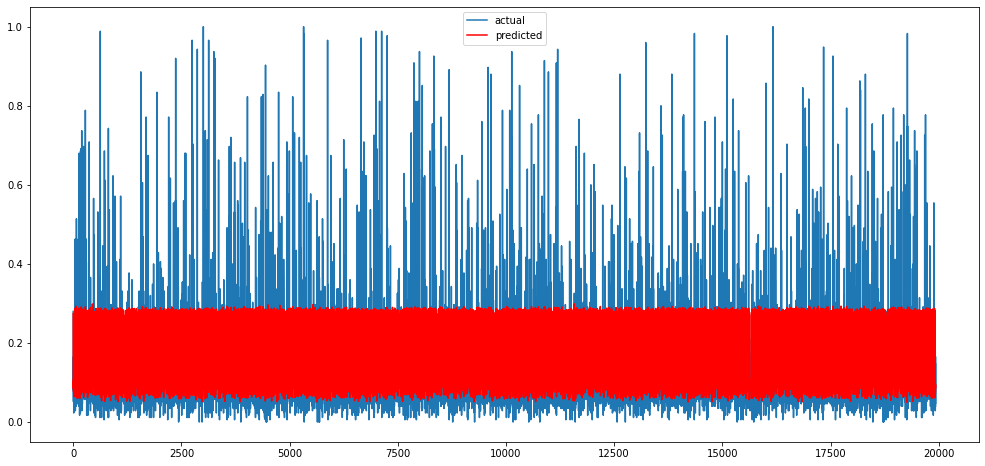

In [1489]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [1490]:
#dt = DecisionTreeRegressor(criterion='absolute_error', splitter='random')  
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)  

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 0.08819512049127619
Variance score: 0.15
Mape: 313178217533.68
max_error: 0.83


In [1491]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=200, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='canberra', metric_params=None)

kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 0.06500867603913682
Variance score: 0.54
Mape: 420072077596.41
max_error: 0.75


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=40, max_depth= 500, 
eta = 0.2, min_child_weight=1, alpha= 5, num_parallel_tree= 5)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)


print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred)))

In [ ]:
xgb.plot_importance(xgb_model)


#Stack model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Train the base models on the train set and make predictions on the validation set
kn = KNeighborsRegressor(n_neighbors=200, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='canberra', metric_params=None)
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_val)

lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=40, max_depth=500, eta=0.2, min_child_weight=1, alpha=5, num_parallel_tree=5)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

# Train the meta-model on the validation set predictions
X_meta = np.column_stack((y_pred_kn, y_pred_lr, y_pred_xgb))
meta_model = LinearRegression()
meta_model.fit(X_meta, y_val)

# Make predictions on the test set using the base models and the meta-model
y_pred_kn_test = kn.predict(X_test)
y_pred_lr_test = lr.predict(X_test)
y_pred_xgb_test = xgb_model.predict(X_test)
X_meta_test = np.column_stack((y_pred_kn_test, y_pred_lr_test, y_pred_xgb_test))
y_pred_stacked = meta_model.predict(X_meta_test)

# Compute the mean squared error of the stacked ensemble on the test set

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_stacked)))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred_stacked)))
print('Mape: %.2f' % (metrics.mean_absolute_percentage_error(y_test, y_pred_stacked)))
print('max_error: %.2f' % (metrics.max_error(y_test, y_pred_stacked)))

# 4.- Results

#5.- Comments

Add weather information,Gate location, flight distance, Online boarding, Baggage handling, Inflight wifi service, satisfaction, Customer Type, gender.

Trabajar con los outliers